In [1]:
# torchvision.dataset = get dataset and dataloading for computer vision
# torchvision.models = using pre trained models for our own
# torchvision transforms = functions for manipulating images
# torch.utls.data.Dataset = base dataset class to create our own dataset

In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets, transforms 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#check version
print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113
0.13.1+cu113


## Getting the dataset

In [3]:
# We are going to use FashionMNIST dataset for this learning
# setup training data

train_data = datasets.FashionMNIST(
    root="data", # where we want to save the dataset to
    train=True, # we want the training dataset
    download=True, # we want to download the dataset
    transform=ToTensor(), # convert the images to tensors as needed
    target_transform=None # how doo we want to transform the labels
)

test_data = datasets.FashionMNIST(
    root="data", 
    train=False, 
    download=True, 
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the first training example
# we find the images to tensor. 
# PIL image - Python Image Library
# check to_transform documentation
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
# check the target classes 
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
# getting ids for the different classes

class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

# grayscale - so 1 color channel

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


## Visualize data as image

(-0.5, 27.5, 27.5, -0.5)

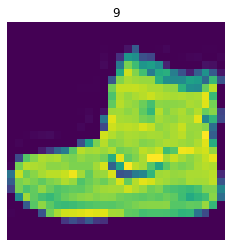

In [10]:
plt.imshow(image.squeeze()) # matplotlib expects only the image W and H, so we get rid of the extra color dim
# squeeze removes the unit dimension
plt.title(label) # only 28 * 28 image so very pixelated looking
plt.axis(False)

Text(0.5, 1.0, 'Ankle boot')

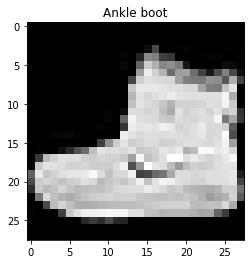

In [11]:
plt.imshow(image.squeeze(), cmap='gray') # matplotlib expects only the image W and H, so we get rid of the extra color dim
# squeeze removes the unit dimension
plt.title(class_names[label]) # only 28 * 28 image so very pixelated looking

In [12]:
# Plotting 16 random images
#torch.manual_seed(750)
#fig=plt.figure(figsize=(9, 9))
#rows, cols = 4, 4 # we are going to get 16 images
#for i in range(1, rows*cols+1):
  #print(i)
#  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  #print(random_idx) # we get different images based on the  seed
#  img, label=train_data[random_idx]
#  fig.add_subplot(rows, cols, i)
#  plt.imshow(img.squeeze(), cmap="gray")
#  plt.title(class_names[label])
#  plt.axis(False)

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## Prepare dataloader 

## Dataloader to turn the dataset in python iterable

### Turn data into batches or mini batches

#### Lets us take for now mini batches of 32 each
#### the optimizer will update per batch, So the training gets efficient. The batches will be shuffled.



In [14]:
from torch.utils.data import DataLoader # also goes for text and any other datatypes

# set the hyperparam batch size
BATCH_SIZE=32

# Turn the dataset into iterable
train_dataloader=DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader=DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [15]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f1dc1e17f90>,
 <torch.utils.data.dataloader.DataLoader at 0x7f1dc1e17350>)

In [16]:
print(f"Data Loaders: ", train_dataloader, test_dataloader)
print(f"Train Dataloader:  {len(train_dataloader)} batches of  {BATCH_SIZE}")
print(f"Test Dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Data Loaders:  <torch.utils.data.dataloader.DataLoader object at 0x7f1dc1e17f90> <torch.utils.data.dataloader.DataLoader object at 0x7f1dc1e17350>
Train Dataloader:  1875 batches of  32
Test Dataloader: 313 batches of 32


In [17]:
# check inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# train_features_batch will have the training images
# train labels batch will have the image labels meaning what the features together indicate
# iter will get the nextt batch in the iterator

train_features_batch.shape, train_labels_batch.shape
# torc.Size(batch_size, color_channel, height, width), torch.Size(BATCH_SIZE)

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 5, label_size: torch.Size([])


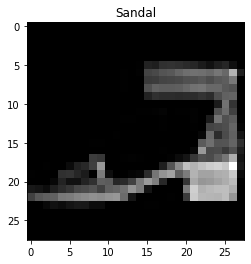

In [18]:
# Show sample
#torch.manual_seed(999)
random_idx= torch.randint(0, len(train_features_batch), size=[1]).item() # creating a random image from the train dataset
img, label= train_features_batch[random_idx], train_labels_batch[random_idx] # getting the random image from the datasett and it particular label
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis=False
print(f"Image size: {img.shape}")
print(f"Label: {label}, label_size: {label.shape}")


## Build a baseline model

Baseline model can be inproved later with experimentation

In [19]:
## Creating a FC flatten layer 

flatten_model = nn.Flatten()

# taking one feature into a different variable
x = train_features_batch[0]

# flattening the input
output = flatten_model(x)

# printing the shape of the first tensor [0] before and after flatteing
print(f"Shape before flattening: {x.shape}, -> [color_channel, height, width]")
print(f"Shape after flatteing: {output.shape}, -> [color_channel, height*width]")

Shape before flattening: torch.Size([1, 28, 28]), -> [color_channel, height, width]
Shape after flatteing: torch.Size([1, 784]), -> [color_channel, height*width]


In [20]:
output # condense information into a single vector

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.5333, 0.8745, 0.7373, 0.9020, 0.2902, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.2275, 0.6078, 0.9529, 0.8471, 0.7804, 0.7765, 0.7922, 0.9686,
         0.8196, 0.4275, 0.0431, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.4078, 0.9020, 0.8627, 0.8196, 0.8000, 0.8039, 0.8039, 0.8039,
         0.8000, 0.8353, 0.8745, 0.8000, 0.0549, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.6627, 0.8078, 0.7765, 0.7961, 0.8000, 0.8000, 0.7961,
         0.7961, 0.7961, 0.7922, 0.7529, 0.8431, 0.4314, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [21]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, 
               input_shape: int, 
               hidden_units: int, 
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(in_features=input_shape, 
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [22]:
torch.manual_seed(42)

## setup model with input params
model_0=FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10, ## how many hidden units for the hidden layer
    output_shape=len(class_names) # one for every class
)

model_0.to("cpu") ## very important line - to keep the model on cpu top run

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
dummy_x=torch.rand([1, 1, 28, 28])
model_0(dummy_x)

# also check what input shape certain layers expect

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [24]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## Set up loss optimizer and evaluation matrix

### Loss function here - cross entropy loss
### Optimizer - stochastic gradient descent

In [25]:
# Calculate accuracy (a classification metric)
#   """Calculates accuracy between truth labels and predictions.
#    Args:
#        y_true (torch.Tensor): Truth labels for predictions.
#        y_pred (torch.Tensor): Predictions to be compared to predictions.
#    Returns:
#        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
#    """
#    correct = torch.eq(y_true, y_pred).sum().item()
#    acc = (correct / len(y_pred)) * 100
#    return acc

In [26]:
# to get the github help function 
import requests
from pathlib import Path

# Download the helper function from learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions already exits, skipping download... ... ..")
else:
  print("Downloading helper_functions.py from PyTorch repo ...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

## Import accuracy metrics

In [27]:
# import accuracy metrics
from helper_functions import accuracy_fn

# setup loss function and optimzer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

## Creating a function to time our experiment

In [28]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  """Time required to train the network"""
  total_time = end - start
  print(f"training time taken on {device}: {total_time:.3f} seconds")
  return total_time

In [29]:
# let us check the timer function

start_time = timer()
# we will put some modelling function code here
end_time = timer()
print_train_time(start_time, end_time, device='cpu')

training time taken on cpu: 0.000 seconds


7.829499999445488e-05

## Creating a training loop

### 1. Loop through epochs.
### 2. Loop through training batches, perform training steps, calculate the train loss *per batch*

### 3. Loop through testing batches, perform testing steps, calculate the test loss per batch
### 4. Time it all

In [30]:
# use tqdm software to check how many epochs our training loop has gone through for the progress bar

from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer() # timer started before beginning the training

# set the number of epochs (we are keeping this small for faster training)
epochs = 3

# Training
for epoch in tqdm(range(epochs)): # to view our progress per epoch
  train_loss = 0
  print(f"epoch number = {epoch}")
  # Running through the training dataset to train our model
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    
    # forward pass
    y_pred=model_0(X)

    # calculate the loss per batch
    loss = loss_fn(y_pred, y) # expected to be quite high as it has loss of all the batches
    train_loss += loss # aggregate the losses of all the batches together

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # check out the train accuracy
    # train_acc+=accuracy_fn(X, )

    # lets now check out by printing what happened
    if batch%400==0:
       print(f"Gone through {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # let us find the average loss for each batch
  train_loss /= len(train_dataloader)

  # Testing
  test_loss, test_acc=0, 0
  model_0.eval()

  with torch.inference_mode():
    for X, y in test_dataloader:
    
      # Forward pass
      test_pred = model_0(X)

      # calculate loss
      test_loss += loss_fn(test_pred, y) # calculating together for all the batches

      # calculating accuracy
      test_acc+=accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)) # comparing the labels so the columns need to be equal sized
      ## the true label is the given one the dataset
      # the argmax finds the highest value index for the prediction label
  
      # calculating the average test loss per batch
    test_loss /= len(test_dataloader)

      # calculating the average test accuarcy per batch
    test_acc /= len(test_dataloader)

  # let us check out whats happening
  print(f"\n Train loss = {train_loss:.2f} | Test loss = {test_loss:.2f} | Test accuracy = {test_acc:.2f}%\n")

# calculate the training time to check how long the model is taking to train on CPU
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                 end=train_time_end_on_cpu,
                                 device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

epoch number = 0
Gone through 0/60000 samples
Gone through 12800/60000 samples
Gone through 25600/60000 samples
Gone through 38400/60000 samples
Gone through 51200/60000 samples

 Train loss = 0.59 | Test loss = 0.51 | Test accuracy = 82.04%

epoch number = 1
Gone through 0/60000 samples
Gone through 12800/60000 samples
Gone through 25600/60000 samples
Gone through 38400/60000 samples
Gone through 51200/60000 samples

 Train loss = 0.48 | Test loss = 0.48 | Test accuracy = 83.20%

epoch number = 2
Gone through 0/60000 samples
Gone through 12800/60000 samples
Gone through 25600/60000 samples
Gone through 38400/60000 samples
Gone through 51200/60000 samples

 Train loss = 0.46 | Test loss = 0.48 | Test accuracy = 83.43%

training time taken on cpu: 36.676 seconds


In [31]:
str(next(model_0.parameters()).device)

'cpu'

## Creating a custom function to evaluate our model

In [32]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary with the model name and performance"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Make predictions first
      y_pred = model(X)


      # agggregate the loss and accuracy functions
      loss+=loss_fn(y_pred, y)
      acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

      # find the loss and acc per batch
      loss/=len(data_loader)
      acc/=len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# passing model_0 for evaluation
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0010611428879201412,
 'model_acc': 0.30028917735831345}

## Setup the device agnostic code to use a GPU


In [33]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [34]:
torch.cuda.is_available()

False

In [35]:
# setup device agnostic code
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Building a model with non-linearity

In [36]:
# Create a model with non-linear and linear layers

class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential( # creates a sequence of layers in the network
        nn.Flatten(), #flatten the images to get a single vector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(), #activation function for non-linearity
        nn.Linear(in_features=hidden_units, out_features=output_shape), 
        nn.ReLU()
    )
    # forward pass the inputs
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

## Pass some input, hidden layers and set the output class and fix the model on a GPU

In [37]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784, #28*28
                              hidden_units=10, 
                              output_shape=len(class_names)
).to(device) #device previously set to cuda -> so running the model v1 on that one

# check where the model is now -> on the GPU or CPU
next(model_1.parameters()).device

device(type='cpu')

## Set up loss, optimizer and evaluation matrix

In [38]:
# we have the helper function which contains the acc function and optimizer written inside
from helper_functions import accuracy_fn

# set up the loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

In [39]:
5+5

10

## Create a function for train and test loops

In [40]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer, 
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
      # Send data to GPU
      X, y = X.to(device), y.to(device)
    
      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate loss and train accuracy
      loss = loss_fn(y_pred, y)
      train_loss += loss # aggregate the losses per batch
      train_acc += accuracy_fn(y_true=y, 
                             y_pred=y_pred.argmax(dim=1)) # from logits we are taking the predicted labels

      # 3. Optimizer zero grad
      optimizer.zero_grad() # asking the optimier to find the min gradient
    
      # 4. Loss backward
      loss.backward() # back propagation to tweak the hyperparams

      # 5. Optimizer step
      optimizer.step() # optimizing with the back propagated values 

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader) # data_loader has all the batches loaded inside
    train_acc /= len(data_loader) # finding the values per batch to get the average
    # let us print it to see what is happening
    print(f"train_loss = {train_loss:.2f} | train_acc = {train_acc:.2f}%")

# Do the same for test function

In [41]:
# function for the test loop
def test_step(data_loader: torch.utils.data.DataLoader, #loading the dataset first in the test_step 
              model: torch.nn.Module,
              loss_fn: torch.nn.Module, 
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put the model in evaluation mode for performance measure

    # Turn on inference context manager
    with torch.inference_mode():
      for X, y in data_loader:
        # Send data to GPU
        X, y = X.to(device), y.to(device) # passing the test inputs and labels to the GPU
        
        # 1. Forward pass
        test_pred = model(X)
        
        # 2. Calculate loss and accuracy
        test_loss += loss_fn(test_pred, y)
        test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

      # Adjust metrics and print out
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
    
      # let us print out the acc metrics
      print(f"test_loss = {test_loss:.2f} test_acc = {test_acc:.2f}%")

In [42]:
## Let us now put the model in action and check whats happening

torch.manual_seed(42)

# let us start the timer
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# setting the number of epochs
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"\n epoch # {epoch}\n")

  # set up the train function with our parameters for the model1
  train_step(model=model_1, 
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer, 
             accuracy_fn=accuracy_fn)
  
  # set up the test function similarly
  test_step(data_loader=test_dataloader, 
            model=model_1,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)
  
train_time_end_on_gpu = timer()

# printing timing and progress bar
total_train_time_on_gpu = print_train_time(start=train_time_start_on_gpu,
                                           end=train_time_end_on_gpu, 
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]


 epoch # 0

train_loss = 1.09 | train_acc = 61.34%
test_loss = 0.96 test_acc = 65.00%

 epoch # 1

train_loss = 0.78 | train_acc = 71.93%
test_loss = 0.72 test_acc = 73.91%

 epoch # 2

train_loss = 0.67 | train_acc = 75.94%
test_loss = 0.69 test_acc = 75.02%
training time taken on cpu: 25.495 seconds


# Building a CNN

Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer

to do so, we'll leverage the nn.Conv2d() and nn.MaxPool2d() layers from torch.nn

In [77]:
# replicating CNN explainer website architecture
from torch.nn.modules.conv import Conv2d
class FashioMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    # building the first conv block
    # learn patters to represent data
    self.block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape, # input neurons
                out_channels=hidden_units, # hidden layer
                kernel_size=3, # size of the filter - 3*3
                stride=1, #default stride
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units, 
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                   stride=2) # defaults stride value for MaxPool is same as the kernel size
    )
    # building the second conv block
    # learn patters to represent data
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units, # the outputs from the previous layer will move directly in to the next  conv layer 
                  kernel_size=3, 
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, 
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    # output from the conv layers will be a multi dimensional tensor - thus flattening needed
    # building the classifier layer
    self.classifier = nn.Sequential(
        nn.Flatten(), # to make the tensor flatten to fit into the classifier layer
        nn.Linear(in_features=hidden_units*7*7, # trick to calc this
                  out_features=output_shape)
    )

    # function to feed forward the network
  def forward(self, x: torch.Tensor):
    x=self.block_1(x) # passing the inputs through the first conv layer
    #print(f"Output shape of conv_block1: {x.shape}") # checking the shape after the first pass
    x=self.block_2(x) # passing the outputs from the prev conv block as input to the next conv block
    #print(f"Output shape of conv_block2: {x.shape}") # checking the shape after the second conv
    x=self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x

In [78]:
torch.manual_seed(42)

model_2 = FashioMNISTModelV2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device) # same as the CNN explainer tiny vggm
model_2

FashioMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [45]:
image.shape # 1 color channel - b&w 

torch.Size([1, 28, 28])

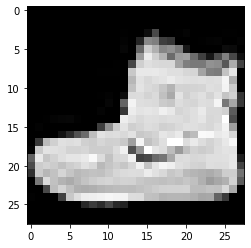

In [46]:
plt.imshow(image.squeeze(), cmap='gray')

In [47]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [48]:
# pass image through model_2
model_2(rand_image_tensor.unsqueeze(0).to(device))

Output shape of conv_block1: torch.Size([1, 10, 14, 14])
Output shape of conv_block2: torch.Size([1, 10, 7, 7])
Output shape of classifier: torch.Size([1, 10])


tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [49]:
#model_2.state_dict()

# Creating a random image with numbers

In [50]:
torch.manual_seed(42)

# creating a batch of images with random numbers
images=torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {image.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978

In [51]:
test_image.shape

torch.Size([3, 64, 64])

In [52]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [53]:
# We want to pass data in and assign some random numbers to best represent out data

In [68]:
torch.manual_seed(42)
# Creating a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10 ,
                       kernel_size=3,
                       stride=1, # change can be observed with different values of the coonv params
                       padding=1)

# Pass the data through the covn layer
conv_output = conv_layer(test_image)
conv_output.shape # creates tensors of images as output as rand numbers by performing conv op

torch.Size([10, 64, 64])

In [56]:
test_image.shape

torch.Size([3, 64, 64])

# MaxPool2d 

In [69]:
# let us try first with our rand created image
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through the conv later
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"test image through conv_layer(): {test_image_through_conv.shape}")

# pass data through the max pool layer
test_image_through_conv_anc_max_pool = max_pool_layer(test_image_through_conv)
print(f"test image after the conv and max pool layer: {test_image_through_conv_anc_max_pool.shape}")

test image through conv_layer(): torch.Size([1, 10, 64, 64])
test image after the conv and max pool layer: torch.Size([1, 10, 32, 32])


In [70]:
# Creating a random tensor to check op of maxpool

torch.manual_seed(42)
# creating a random tensor
random_tensor = torch.randn(size=(1, 1, 2, 2))

#creating a maxpool 2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# passing the random tensor through the maxpool layer
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\n random tensor: \n{random_tensor}")
print(f"\n random tensor shape: {random_tensor.shape}")
print(f"\n max pool tensor: {max_pool_tensor}") # will give out the max element from the matrix
print(f"\n max pool tensor: {max_pool_tensor.shape}") # reduced the shape


 random tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

 random tensor shape: torch.Size([1, 1, 2, 2])

 max pool tensor: tensor([[[[0.3367]]]])

 max pool tensor: torch.Size([1, 1, 1, 1])


# Set up a loss function and optimizer for model #2

In [79]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                            lr=0.1)

# Training and testing using our defined functions

In [80]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measuring train time
from timeit import default_timer as timer
train_time_start_model2 = timer()

# train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"epoch {epoch} \n")
  train_step(data_loader=train_dataloader, 
             model=model_2,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  
  test_step(data_loader=test_dataloader,
            model=model_2,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  
train_time_end_model2 = timer()
total_train_time_model2 = print_train_time(start=train_time_start_model2,
                                           end=train_time_end_model2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch 0 

train_loss = 0.60 | train_acc = 78.38%
test_loss = 0.40 test_acc = 85.99%
epoch 1 

train_loss = 0.37 | train_acc = 86.90%
test_loss = 0.35 test_acc = 86.91%
epoch 2 

train_loss = 0.33 | train_acc = 88.13%
test_loss = 0.33 test_acc = 88.07%
training time taken on cpu: 169.010 seconds


In [81]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

